In [178]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.offline as py
# py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [179]:
from pandas.tseries.offsets import BDay

In [180]:
df=pd.read_csv('Sparkling.csv')


In [181]:
df.shape

(187, 2)

In [182]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [183]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [184]:
date = pd.date_range(start='01-01-1980', end='08-01-1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [185]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
print(df.head())
print(df.tail())

  YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31
    YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31


In [186]:
df.drop('YearMonth',axis=1,inplace=True)

In [187]:
df.set_index('Time_Stamp',inplace=True)

In [188]:
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [189]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

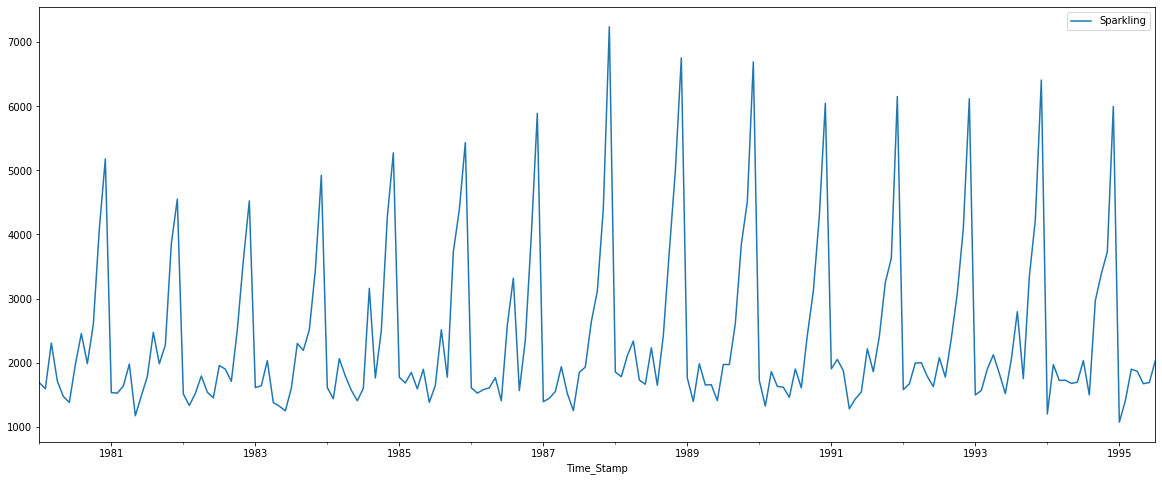

In [190]:
df.plot()

In [191]:
df.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)

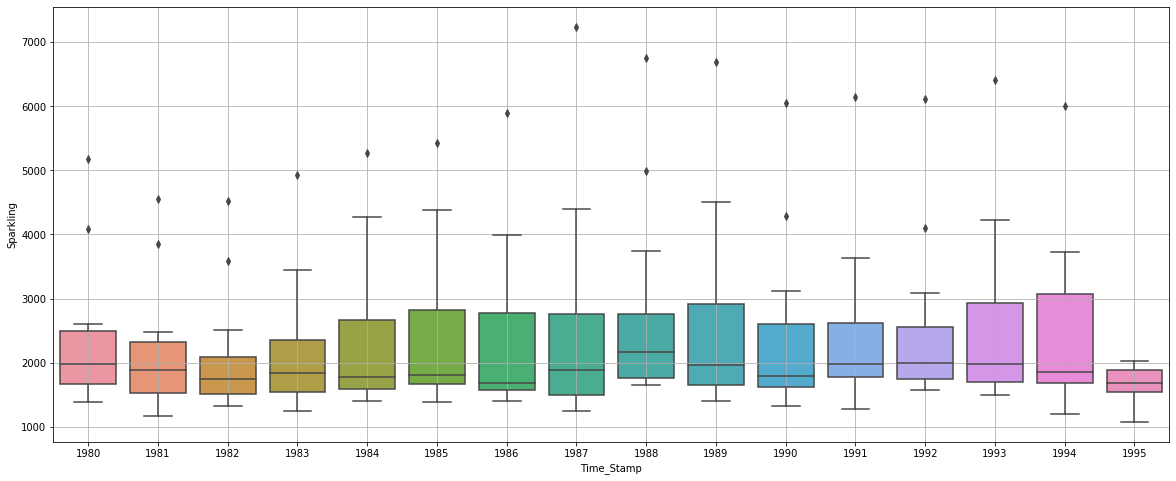

In [192]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

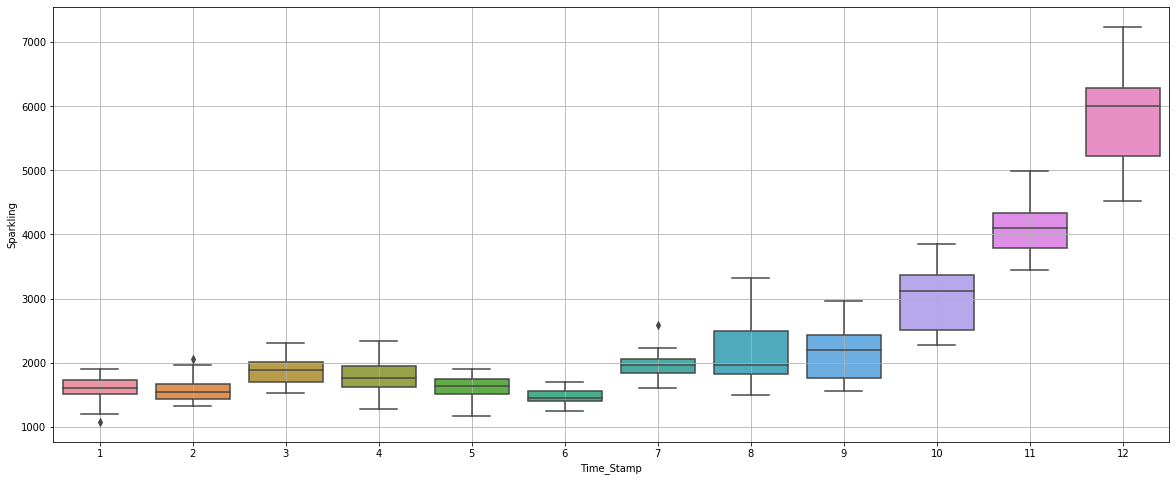

In [193]:
sns.boxplot(x = df.index.month,y = df['Sparkling'])
plt.grid();

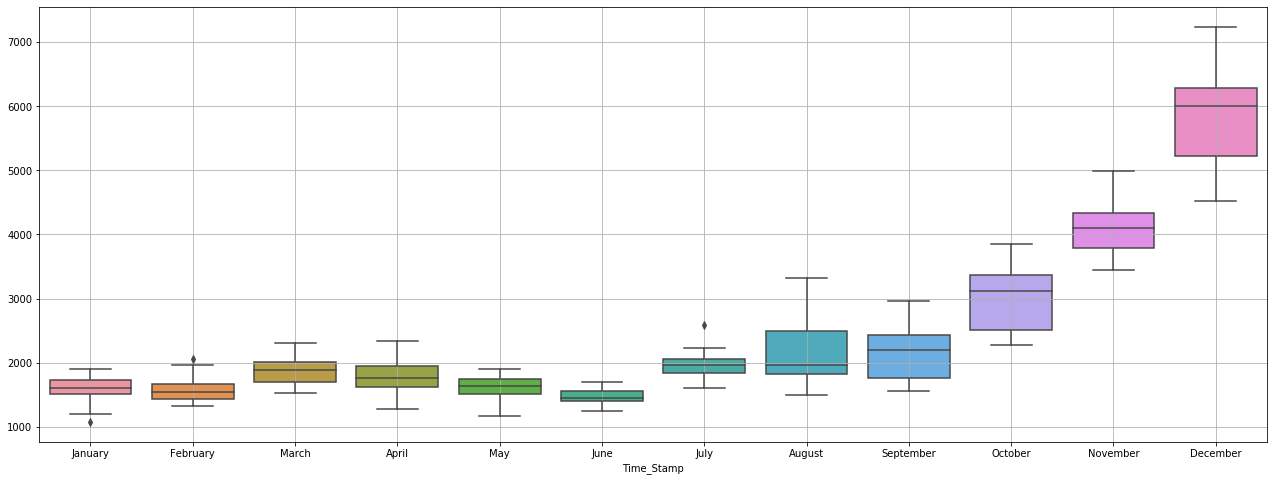

In [194]:
from statsmodels.graphics.tsaplots import month_plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [195]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


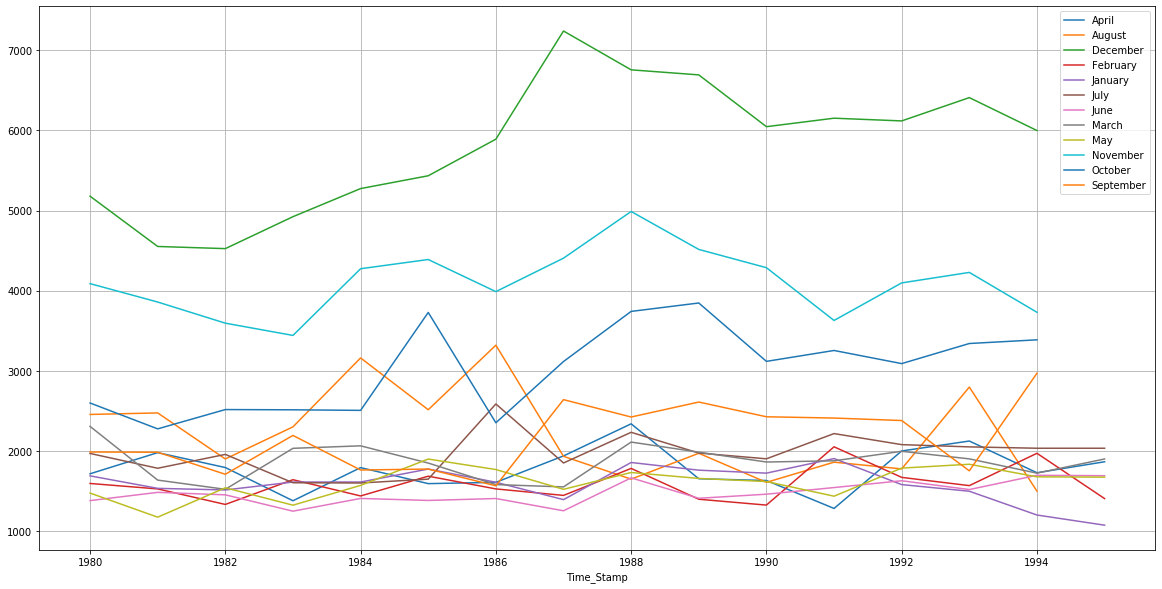

In [196]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [197]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

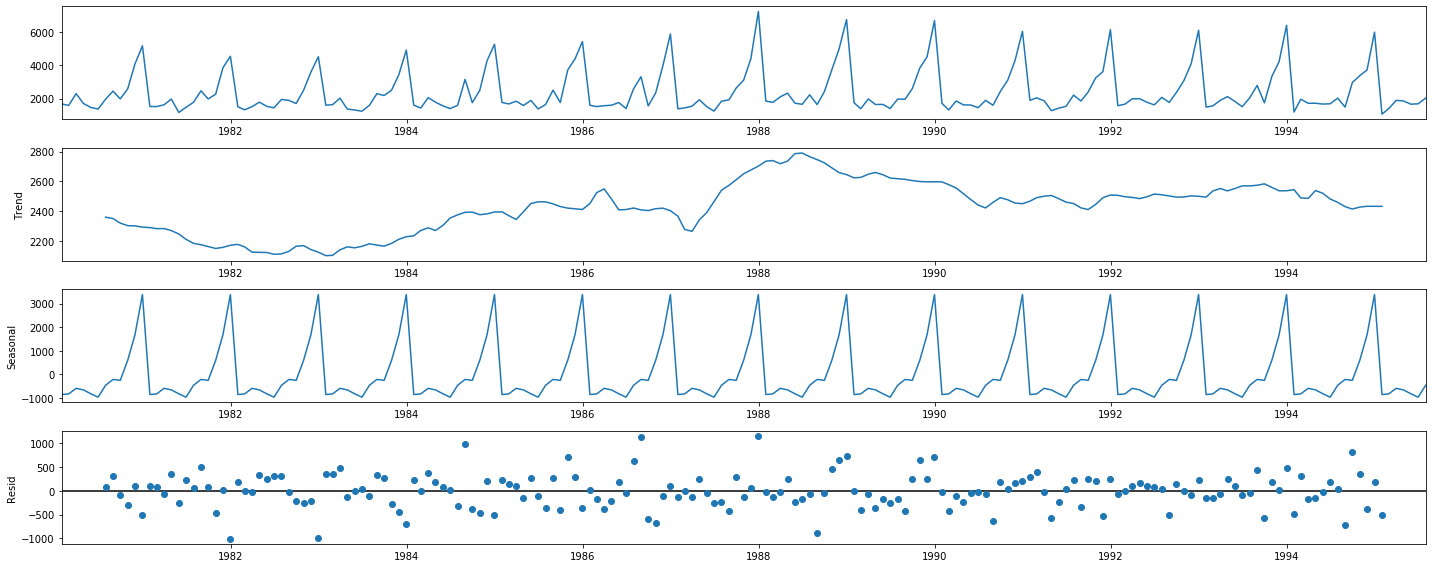

In [198]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

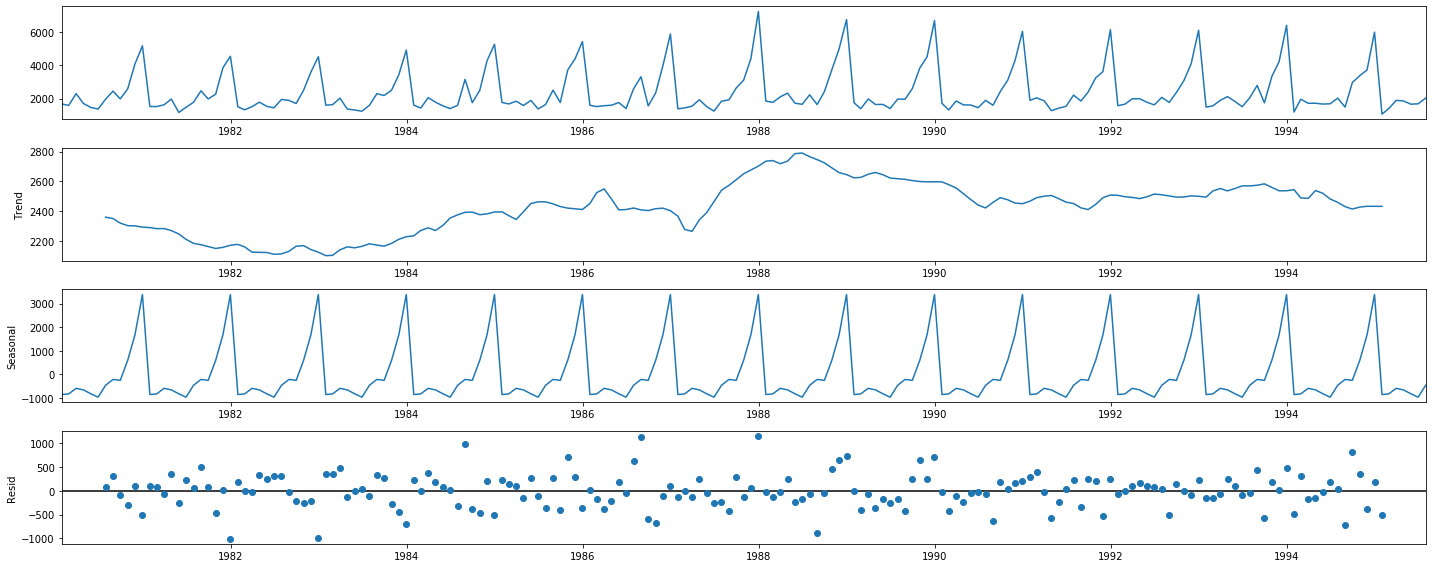

In [199]:
decompositionMulti = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [200]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [201]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [202]:
train

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116


In [203]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [204]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



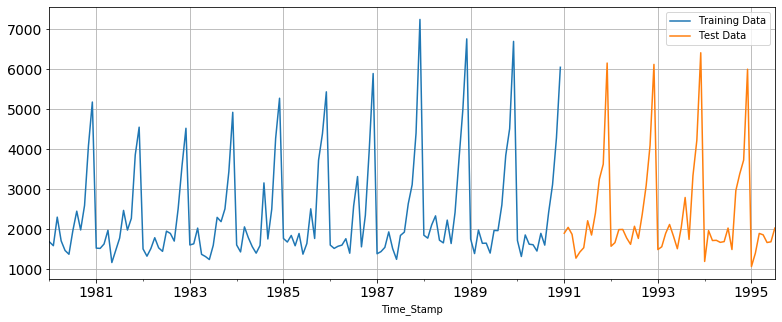

In [205]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [206]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [207]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [208]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
lr = LinearRegression()

In [211]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

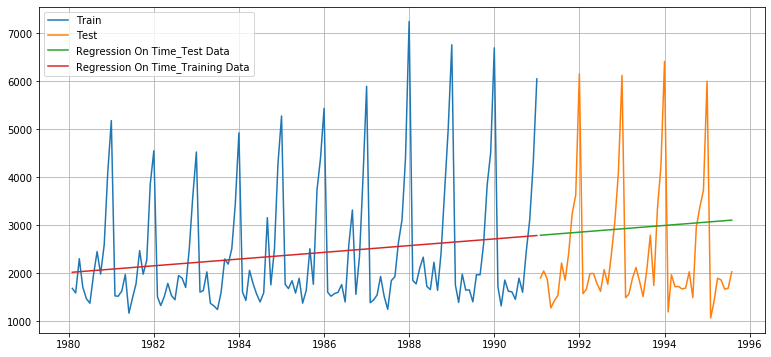

In [212]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [213]:
from sklearn import metrics

In [214]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [215]:
# Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [216]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [217]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


## Naive Model

In [218]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [219]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [220]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

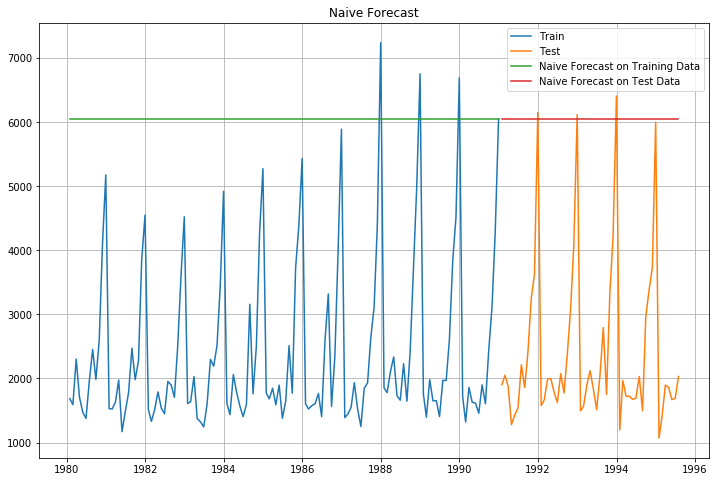

In [221]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [222]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [223]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [224]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87


## Simple Average

In [225]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [226]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
Time_Stamp,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [227]:
SimpleAverage_test['mean_forecast'] = test['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2399.145455
1991-02-28,2049,2399.145455
1991-03-31,1874,2399.145455
1991-04-30,1279,2399.145455
1991-05-31,1432,2399.145455


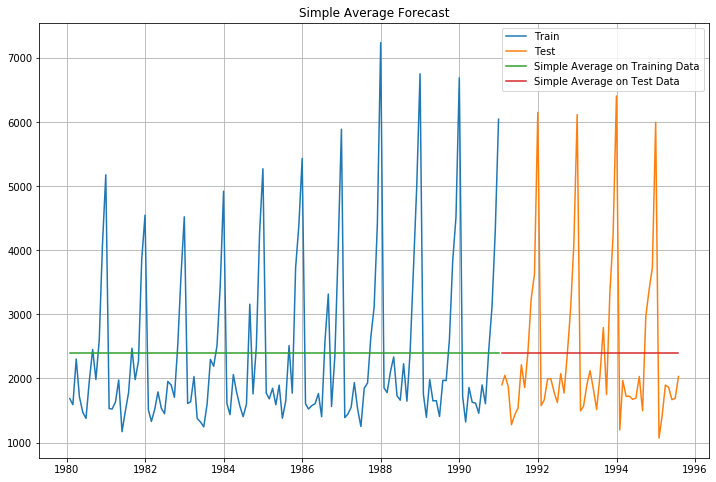

In [228]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [229]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [230]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.073 MAPE is 38.81


In [231]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81


## Moving Average

In [232]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [233]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()


,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


In [234]:
MovingAverage['Trailing_9']

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
                 ...     
1995-03-31    2664.000000
1995-04-30    2645.222222
1995-05-31    2664.666667
1995-06-30    2522.444444
1995-07-31    2372.000000
Name: Trailing_9, Length: 187, dtype: float64

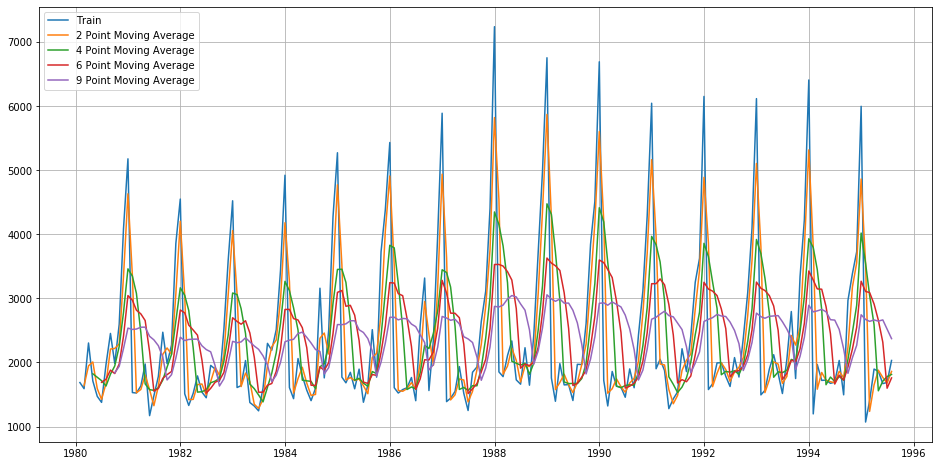

In [235]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [236]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

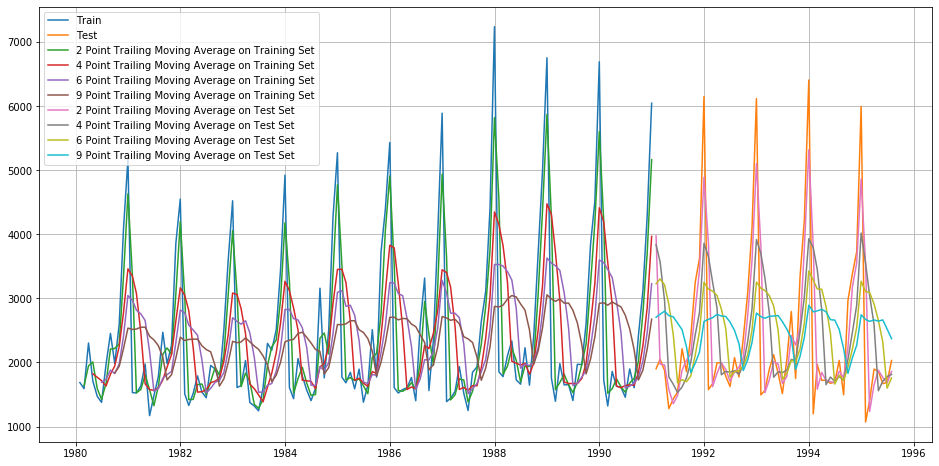

In [237]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [238]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 MAPE is 46.86


In [239]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86


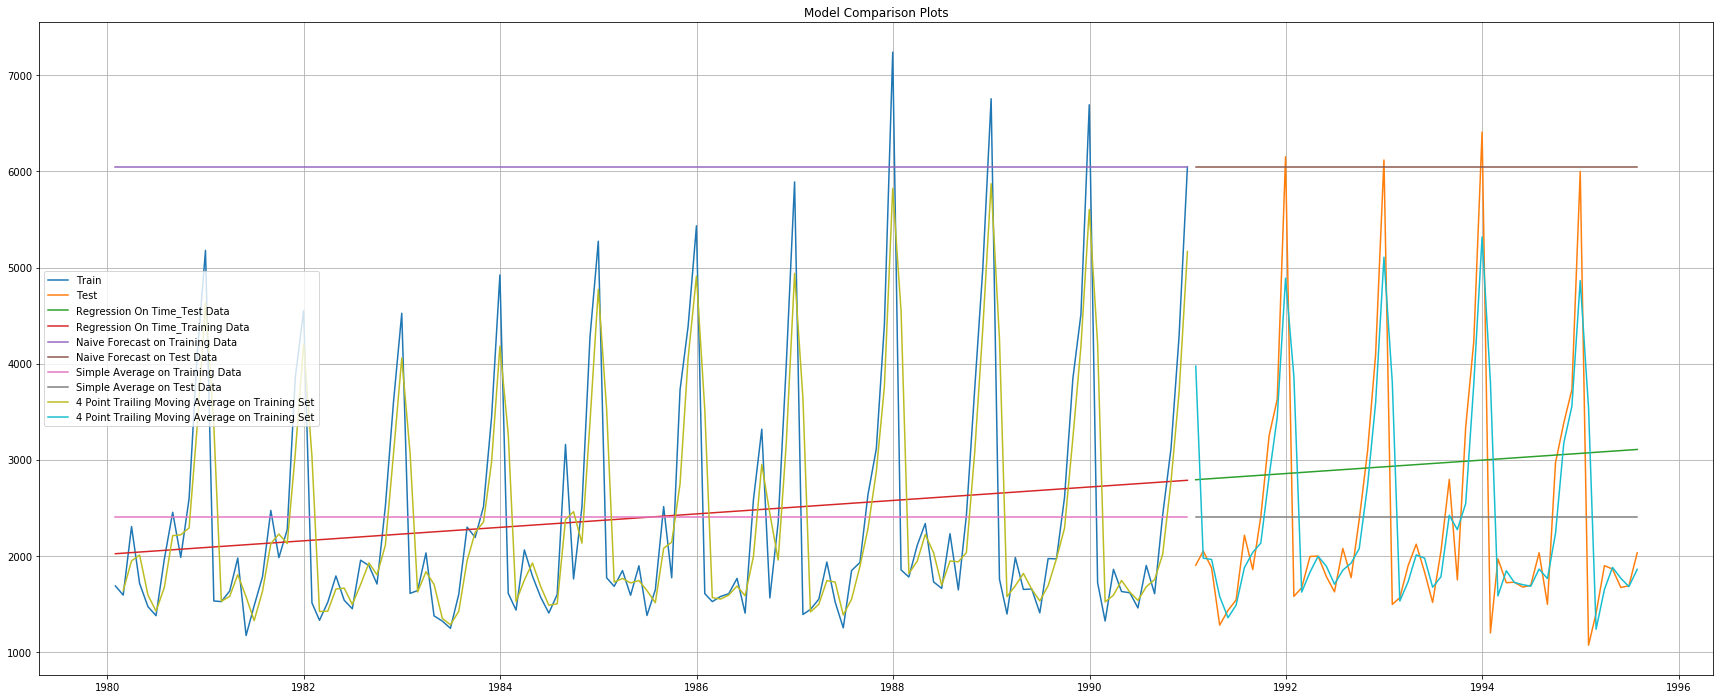

In [240]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [241]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [242]:
SES_train = train.copy()
SES_test = test.copy()

In [243]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [244]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True,smoothing_level=1)

In [245]:
model_SES_autofit.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [246]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sparkling,predict
Time_Stamp,,
1980-01-31,1686,1686.0
1980-02-29,1591,1686.0
1980-03-31,2304,1591.0
1980-04-30,1712,2304.0
1980-05-31,1471,1712.0


In [247]:
len(SES_test)

55

In [248]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,6047.0
1991-02-28,2049,6047.0
1991-03-31,1874,6047.0
1991-04-30,1279,6047.0
1991-05-31,1432,6047.0


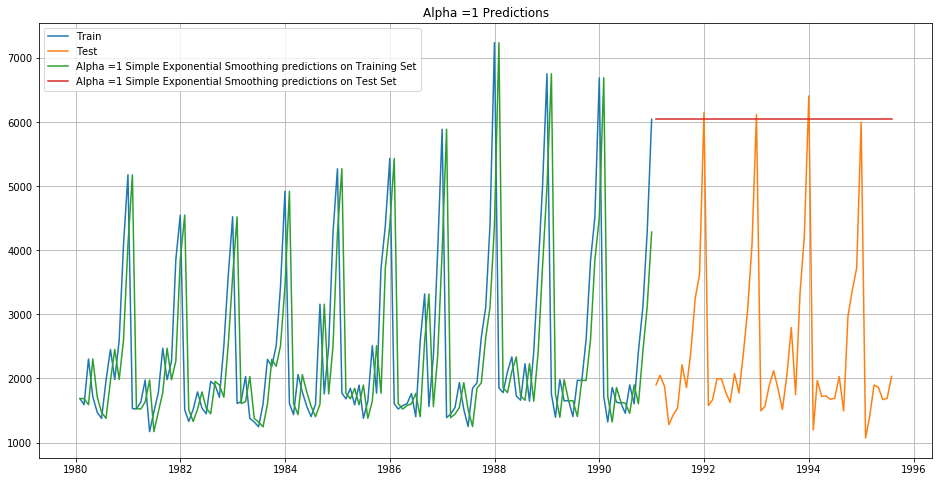

In [249]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [250]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1373.083 MAPE is 35.83


In [251]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 3864.279 MAPE is 152.87


In [252]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",3864.279352,152.87


In [253]:

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [254]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [255]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,1359.422161,43.80,1935.507132,75.66
1,0.4,1352.562367,42.79,2311.919615,91.55
2,0.5,1343.994119,41.18,2666.351413,106.27
3,0.6,1338.801428,39.81,2979.204388,118.77
4,0.7,1338.843297,38.56,3249.944092,129.34
5,0.8,1344.462034,37.60,3483.801006,138.34
6,0.9,1355.723493,36.79,3686.794285,146.08


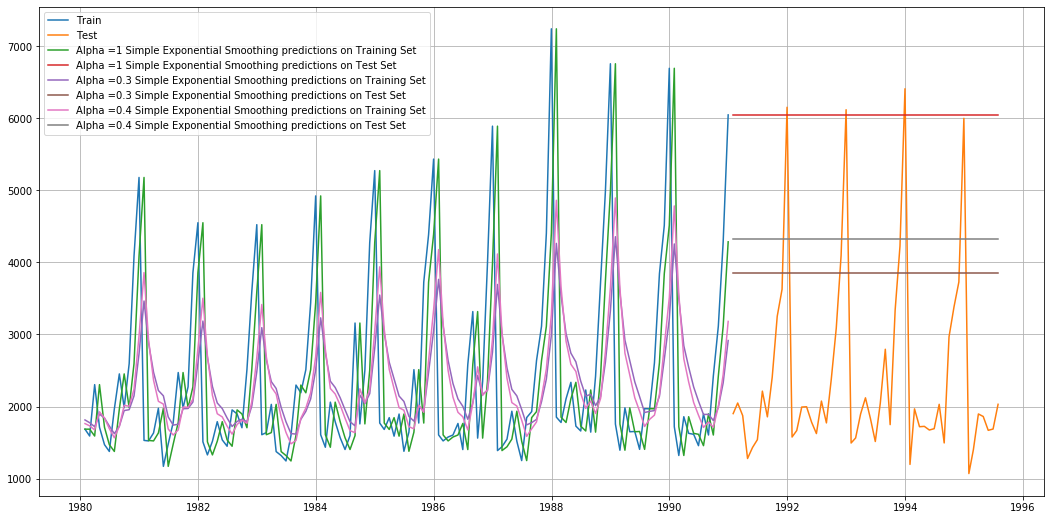

In [256]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [257]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",3864.279352,152.87
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55


## Double Expo Smoothing

In [258]:
DES_train = train.copy()
DES_test = test.copy()

In [259]:
model_DES = Holt(DES_train['Sparkling'])

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [260]:

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [261]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [262]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151688,53.80,18259.110704,675.28
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
2,0.3,0.5,1771.290968,59.94,34401.512440,1264.55
3,0.3,0.6,1848.583857,62.10,42162.748095,1548.94
4,0.3,0.7,1900.315419,62.91,47832.397419,1757.91
...,...,...,...,...,...,...
59,1.0,0.6,1753.362276,45.74,49327.087977,1824.42
60,1.0,0.7,1825.157067,47.96,52655.765663,1945.23
61,1.0,0.8,1901.992952,50.09,55442.273880,2046.36
62,1.0,0.9,1985.351411,52.00,57823.177011,2132.75


In [263]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151688,53.80,18259.110704,675.28
8,0.4,0.3,1568.527728,50.15,23878.496940,886.00
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
16,0.5,0.3,1530.223987,45.98,27095.532414,1007.39
24,0.6,0.3,1506.223120,42.82,29070.722592,1082.18


In [264]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151688,53.80,18259.110704,675.28
8,0.4,0.3,1568.527728,50.15,23878.496940,886.00
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
16,0.5,0.3,1530.223987,45.98,27095.532414,1007.39
24,0.6,0.3,1506.223120,42.82,29070.722592,1082.18


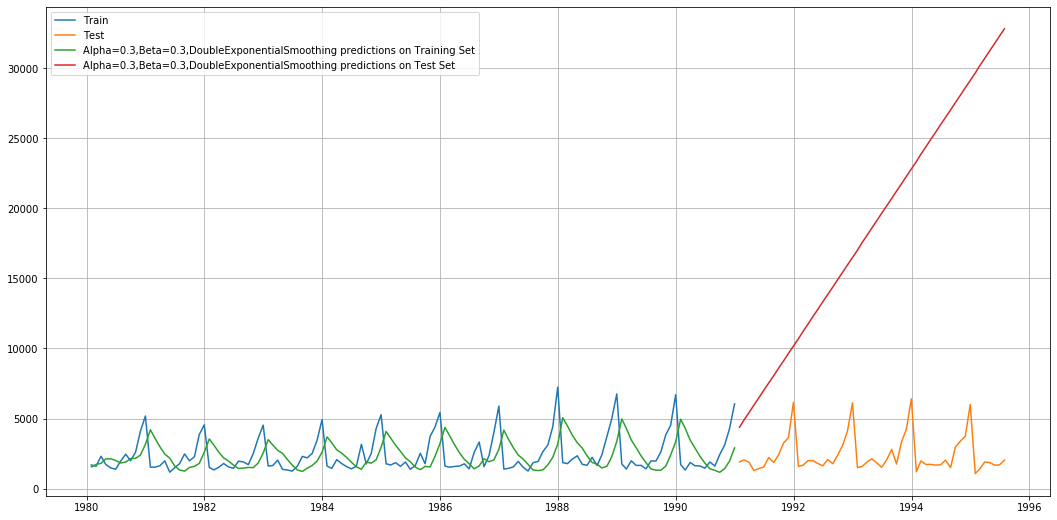

In [265]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [266]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",3864.279352,152.87
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55


## Triple Exponential Smoothing (Holt - Winter's Model)

In [267]:
TES_train = train.copy()
TES_test = test.copy()

In [268]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [269]:
model_TES_autofit = model_TES.fit()

In [270]:
model_TES_autofit.params

{'smoothing_level': 0.15421335095453478,
 'smoothing_slope': 2.635711404809522e-21,
 'smoothing_seasonal': 0.3713203044719535,
 'damping_slope': nan,
 'initial_level': 1639.9993529550134,
 'initial_slope': 4.847510886912855,
 'initial_seasons': array([1.00843556, 0.96899337, 1.24179798, 1.13208862, 0.93984046,
        0.93809957, 1.22459946, 1.54434686, 1.27336536, 1.6319443 ,
        2.48302225, 3.11866904]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [271]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
Time_Stamp,,
1980-01-31,1686,1658.722074
1980-02-29,1591,1602.585004
1980-03-31,2304,2057.497315
1980-04-30,1712,1915.866599
1980-05-31,1471,1568.975238


In [272]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1602.189437
1991-02-28,2049,1373.885664
1991-03-31,1874,1807.434997
1991-04-30,1279,1704.570499
1991-05-31,1432,1602.372107


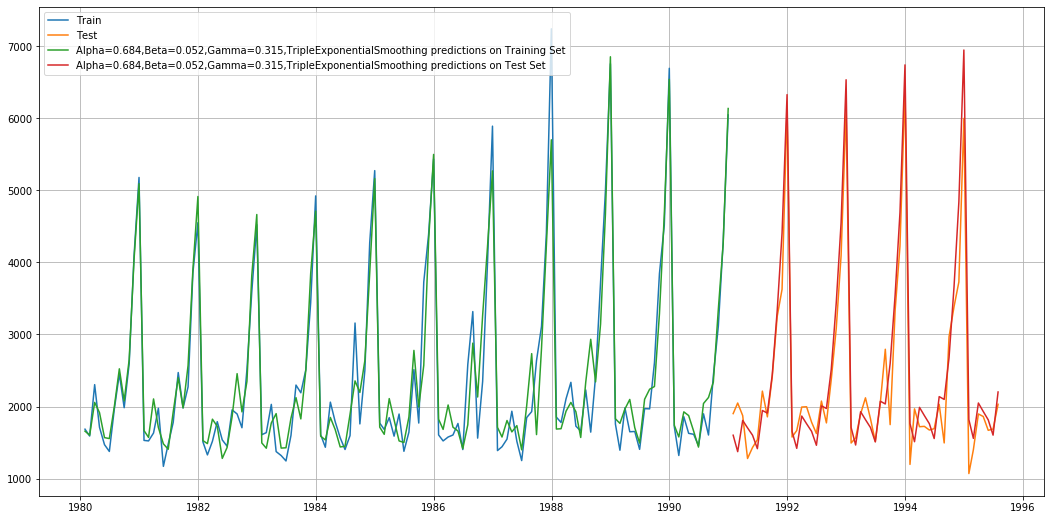

In [273]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [274]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 353.379 MAPE is 10.17


In [275]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.152 MAPE is 11.91


In [276]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",3864.279352,152.87
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55


In [277]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [278]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [279]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,3.447399e+02,11.12
1,0.3,0.3,0.4,397.509631,11.32,8.288458e+02,28.71
2,0.3,0.3,0.5,407.454445,11.13,1.454724e+03,49.75
3,0.3,0.3,0.6,425.506183,11.46,2.076635e+03,70.02
4,0.3,0.3,0.7,465.544707,12.46,3.387272e+03,111.47
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,133843.577353,1201.52,8.243499e+05,18085.61
508,1.0,1.0,0.7,93702.665038,1031.69,1.397222e+06,25633.70
509,1.0,1.0,0.8,104691.065082,1039.56,3.959306e+06,55483.05
510,1.0,1.0,0.9,153710.350473,1385.15,5.642231e+05,8676.89


In [280]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,344.739938,11.12
66,0.4,0.3,0.5,438.072507,12.00,413.543561,14.30
8,0.3,0.4,0.3,424.736193,11.71,420.260362,13.10
464,1.0,0.5,0.3,702.602048,19.87,587.057915,21.58
409,0.9,0.6,0.4,843.777272,21.61,610.232508,18.80


In [281]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,344.739938,11.12
8,0.3,0.4,0.3,424.736193,11.71,420.260362,13.10
66,0.4,0.3,0.5,438.072507,12.00,413.543561,14.30
409,0.9,0.6,0.4,843.777272,21.61,610.232508,18.80
134,0.5,0.3,0.9,890.738250,21.54,624.610927,21.50


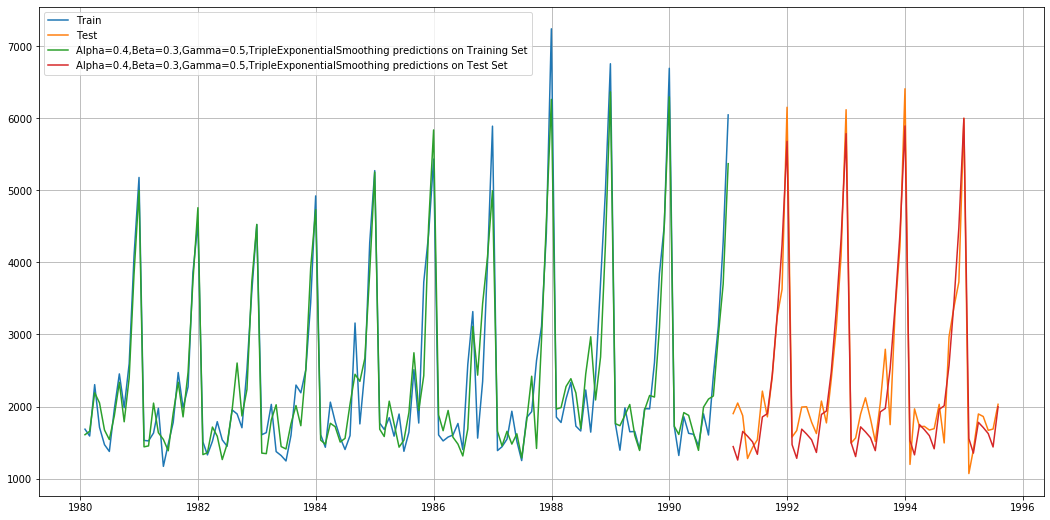

In [282]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [342]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][0]],'Test MAPE':[resultsDf_8_2['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,RMSE,Test RMSE,Test MAPE
"ARIMA(2,1,2)",1374.180166,NaN,NaN
"ARIMA(1,1,1)",1275.081804,NaN,NaN
"SARIMA(0,1,2)(1,0,2,12)",507.869768,NaN,NaN
"SARIMA(1,1,1)(2,1,2,6)",550.954227,NaN,NaN
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",NaN,344.739938,11.12


In [284]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...    344.739938      11.12
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    383.151595      11.91
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.073380      38.81
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
RegressionOnTime                                     1389.135175      50.15
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
NaiveModel                                           3864.279352     152.87
Alpha=1,SimpleExponentialSmoothing            

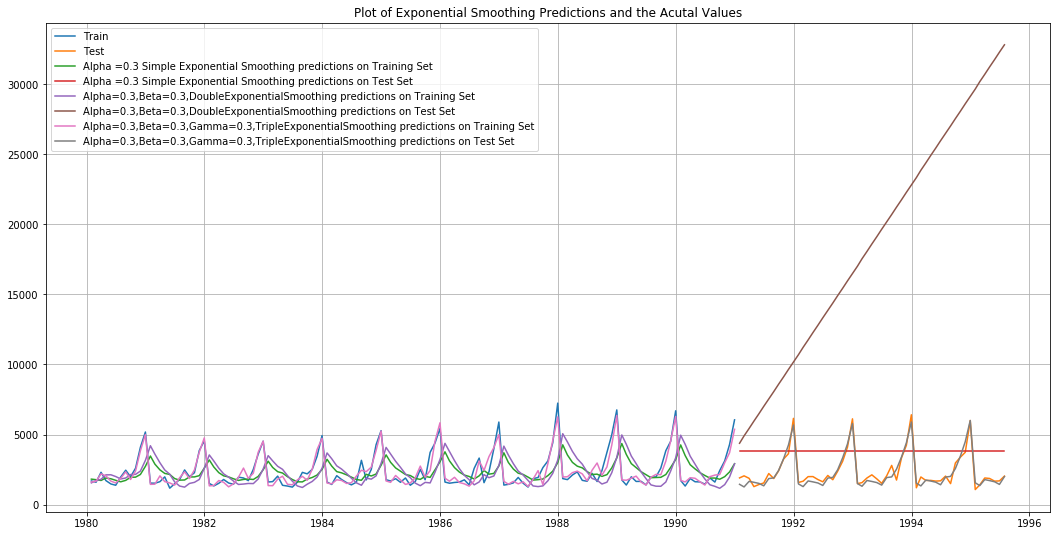

In [344]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Stationary in data

In [286]:
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [287]:
df.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [288]:
train= df[pd.to_datetime(df.index) < pd.to_datetime('1991-01-01')]
train.shape

(132, 1)

In [289]:
test= df[pd.to_datetime(df.index) > pd.to_datetime('1991-01-01')]
test.shape

(55, 1)

In [290]:
train_final = train[['Sparkling']]
test_final=test[['Sparkling']]

In [291]:
print(train_final.shape)
print(test_final.shape)

(132, 1)
(55, 1)


In [292]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

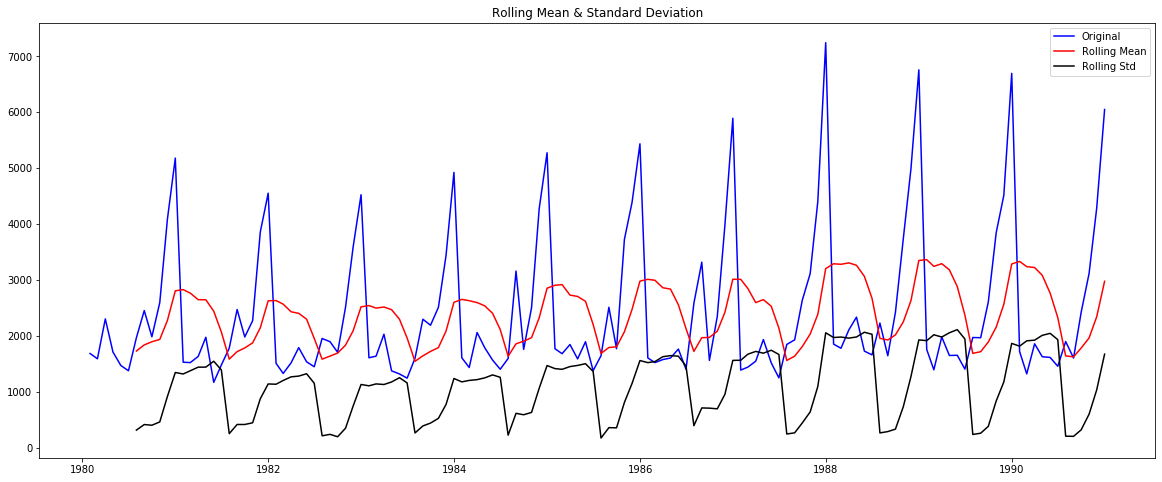

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [293]:
test_stationarity(train_final['Sparkling'])

### Its not stationary at 0.05 interval

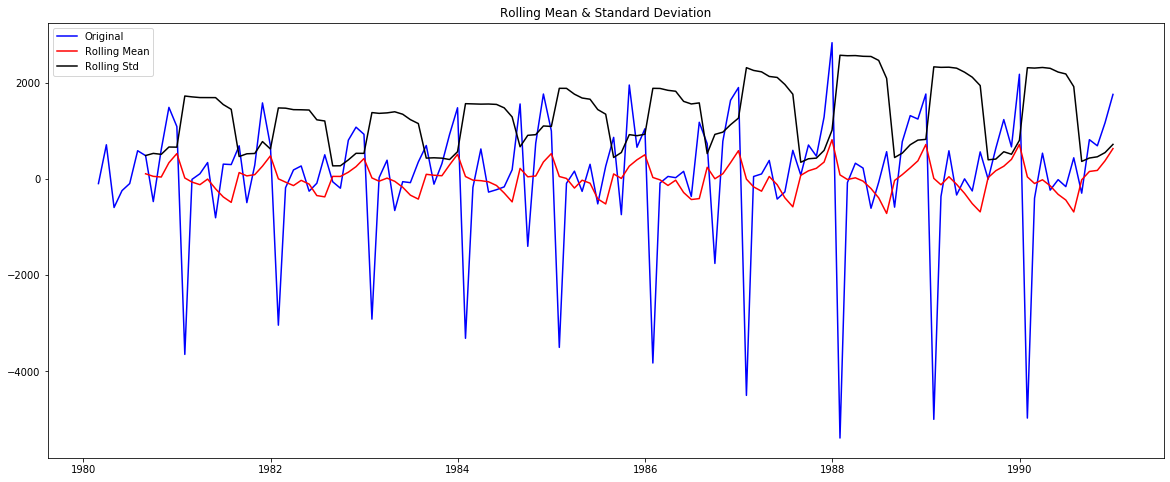

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [294]:
test_stationarity(train_final['Sparkling'].diff().dropna())

In [295]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

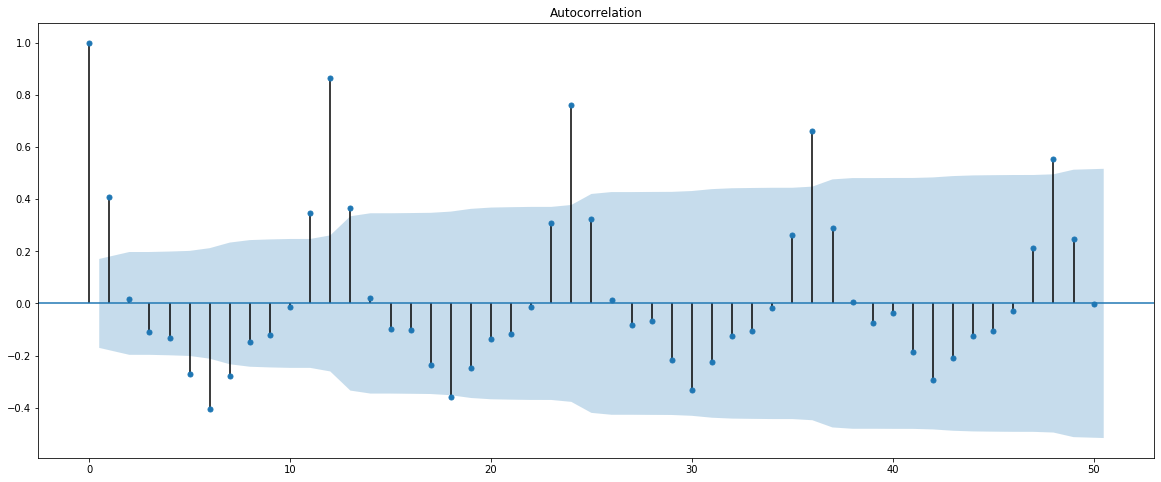

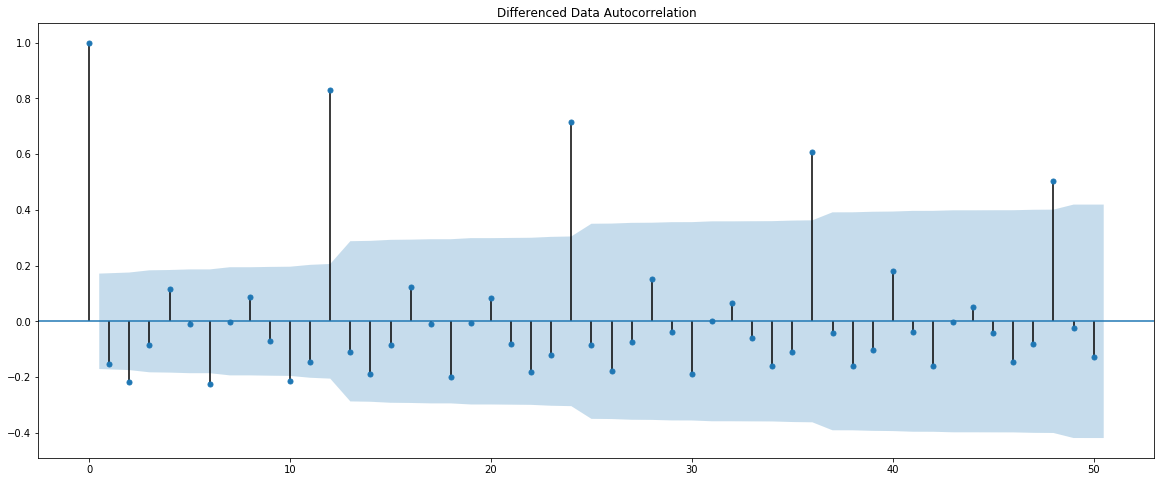

In [296]:
plot_acf(train_final['Sparkling'],lags=50)
plot_acf(train_final['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


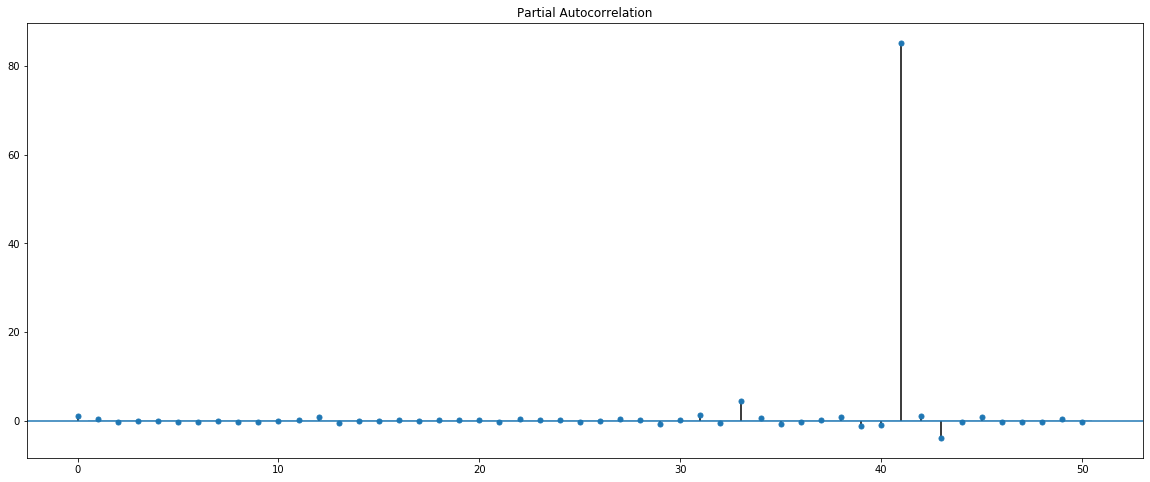

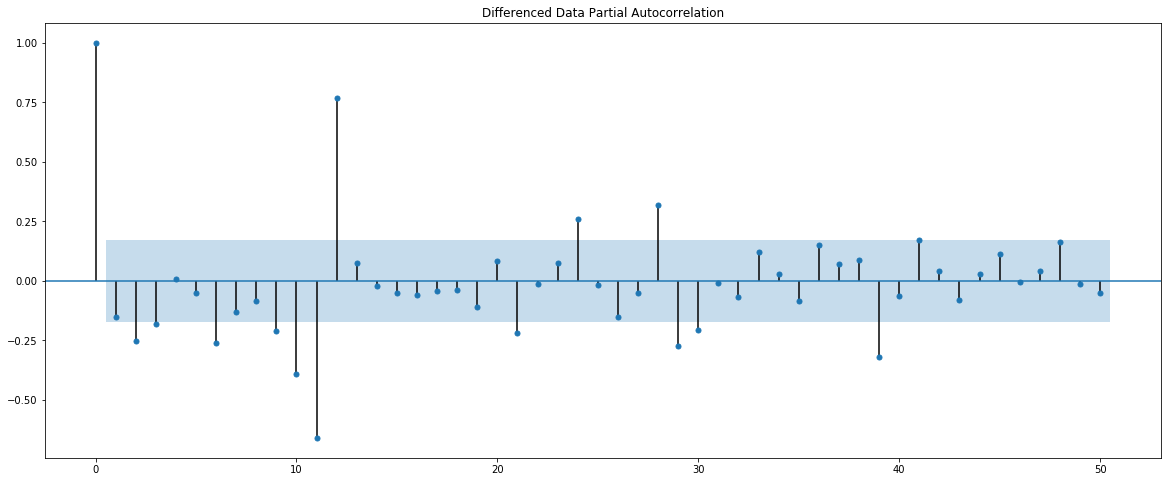

In [297]:
plot_pacf(train_final['Sparkling'],lags=50)
plot_pacf(train_final['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [298]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [299]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [300]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064366922844
ARIMA(0, 1, 2) - AIC:2232.7830976845885
ARIMA(1, 1, 0) - AIC:2268.528060959381
ARIMA(1, 1, 1) - AIC:2235.013945349287
ARIMA(1, 1, 2) - AIC:2233.597647119364
ARIMA(2, 1, 0) - AIC:2262.035600265763
ARIMA(2, 1, 1) - AIC:2232.3604898893323
ARIMA(2, 1, 2) - AIC:2210.623446925909


/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [301]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.623447
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [302]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.312
Method:                       css-mle   S.D. of innovations           1013.491
Date:                Sat, 12 Sep 2020   AIC                           2210.623
Time:                        14:06:19   BIC                           2227.875
Sample:                    02-29-1980   HQIC                          2217.633
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5849      0.518     10.774      0.000       4.569       6.601
ar.L1.D.Sparkling     1.2698      0.075     17.042      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [303]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [304]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.1801664174682


In [305]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.180166


##### Let us look at the ACF and the PACF plots once more.

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


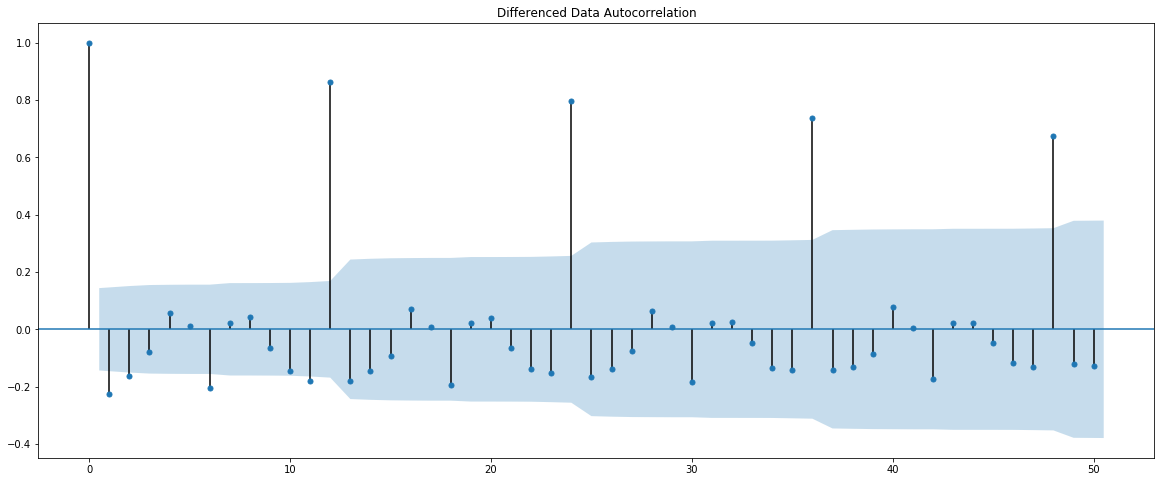

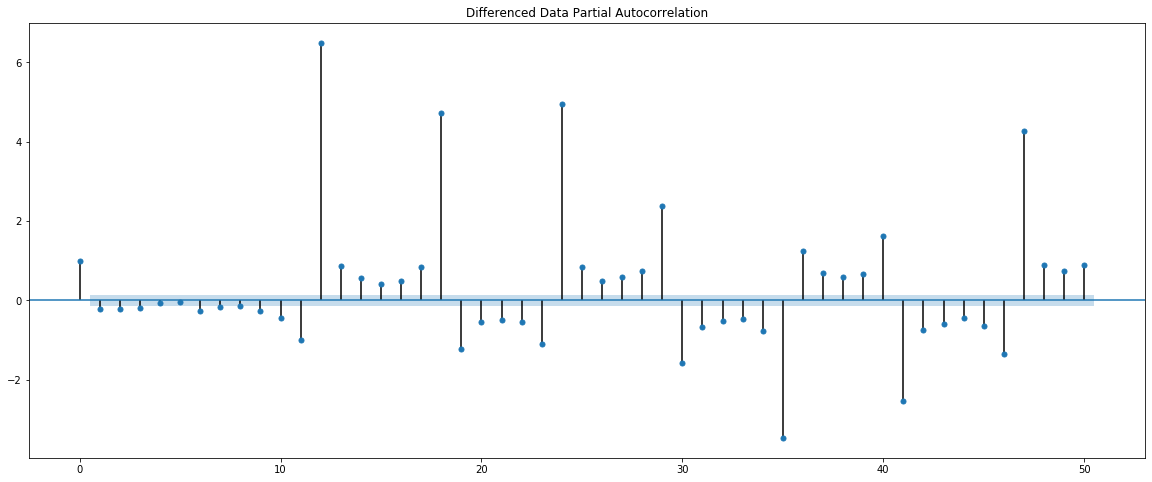

In [306]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [307]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float32'), order=(0,0,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                     ARMA(0, 0)   Log Likelihood               -1133.602
Method:                           css   S.D. of innovations           1298.484
Date:                Sat, 12 Sep 2020   AIC                           2271.203
Time:                        14:06:20   BIC                           2276.969
Sample:                    01-31-1980   HQIC                          2273.546
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.7803    113.018     21.269      0.000    2182.268    2625.292


In [308]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [309]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1275.0818036965309


In [310]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.180166
"ARIMA(1,1,1)",1275.081804


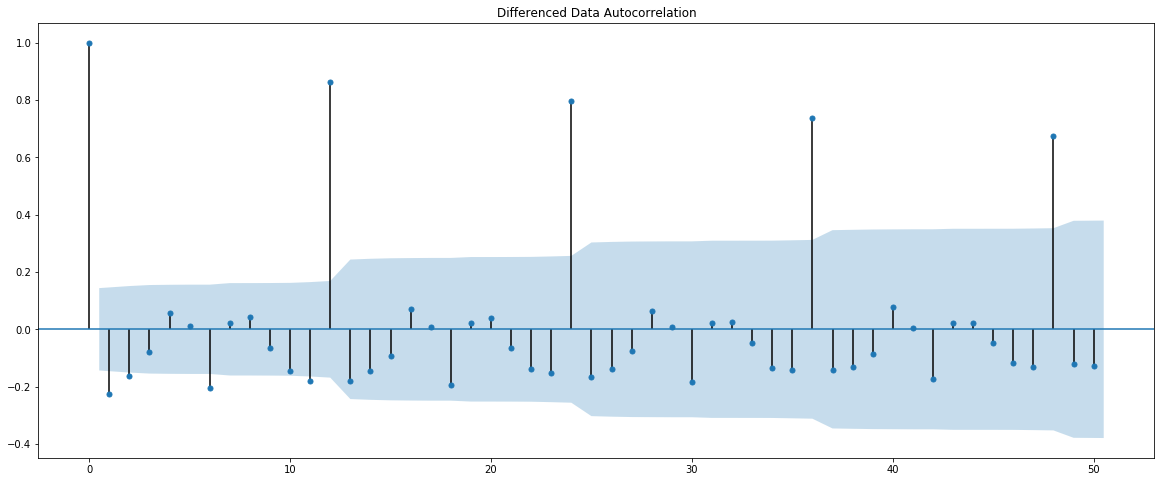

In [311]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [312]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [313]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [314]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616844928
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640239002
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389313
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791405
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.205415861199
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.989805392083
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566671
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089573060616
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838675
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319375936
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509144512222
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954179185
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245084825308
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018824221

In [315]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584261
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934564
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [316]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -772.580
Date:                            Sat, 12 Sep 2020   AIC                           1557.161
Time:                                    14:07:06   BIC                           1573.027
Sample:                                         0   HQIC                          1563.588
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7749      0.101     -7.707      0.000      -0.972      -0.578
ma.L2         -0.1321      0.123   

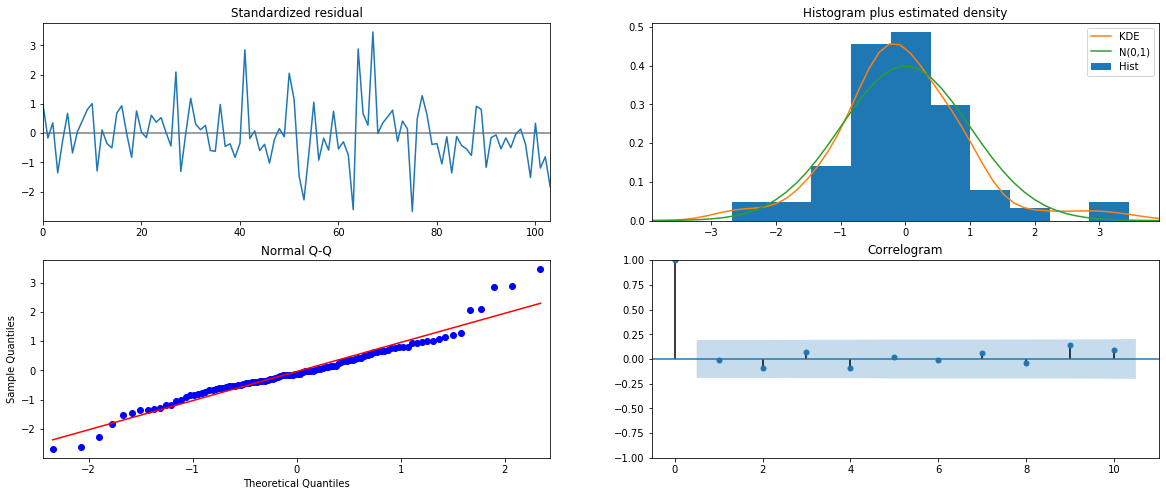

In [317]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [318]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [319]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1425.045948,396.083530,648.736495,2201.355401
1,1241.868442,406.005575,446.112138,2037.624746
2,1711.558513,407.636684,912.605293,2510.511733
3,1589.169714,409.291696,786.972730,2391.366698
4,1448.322062,410.941596,642.891333,2253.752790


In [320]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

507.8697678851318


In [321]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.180166
"ARIMA(1,1,1)",1275.081804
"SARIMA(0,1,2)(1,0,2,12)",507.869768


/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


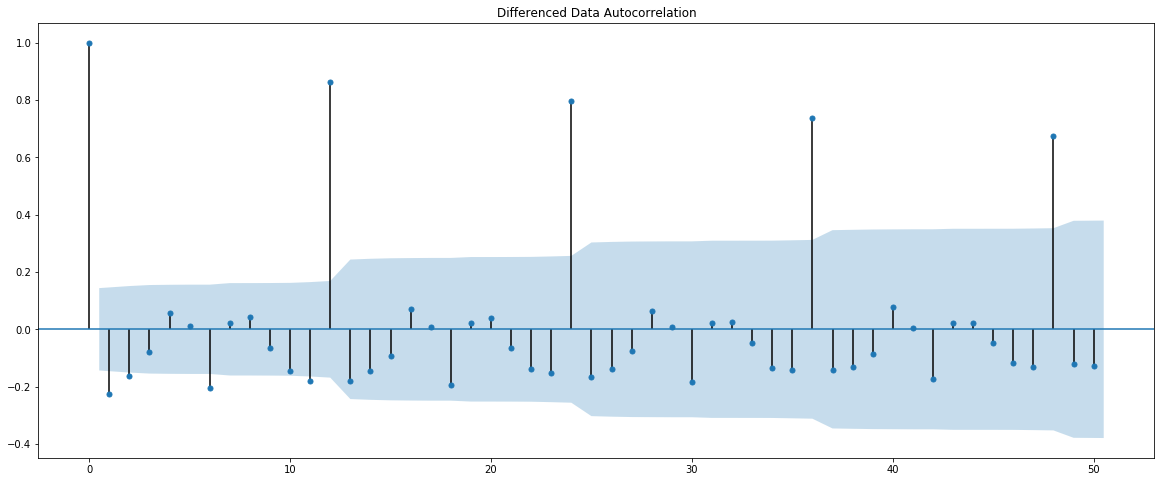

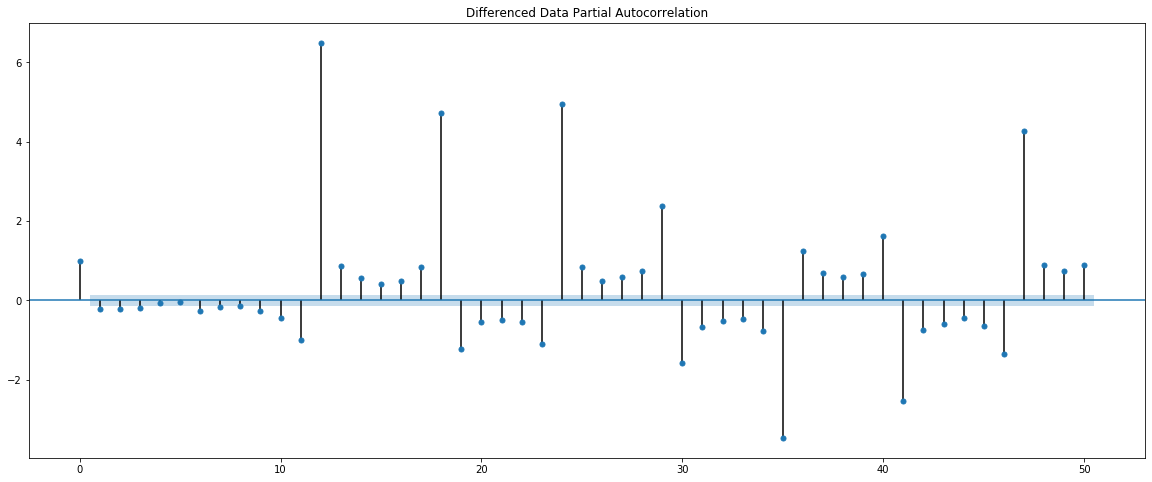

In [322]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

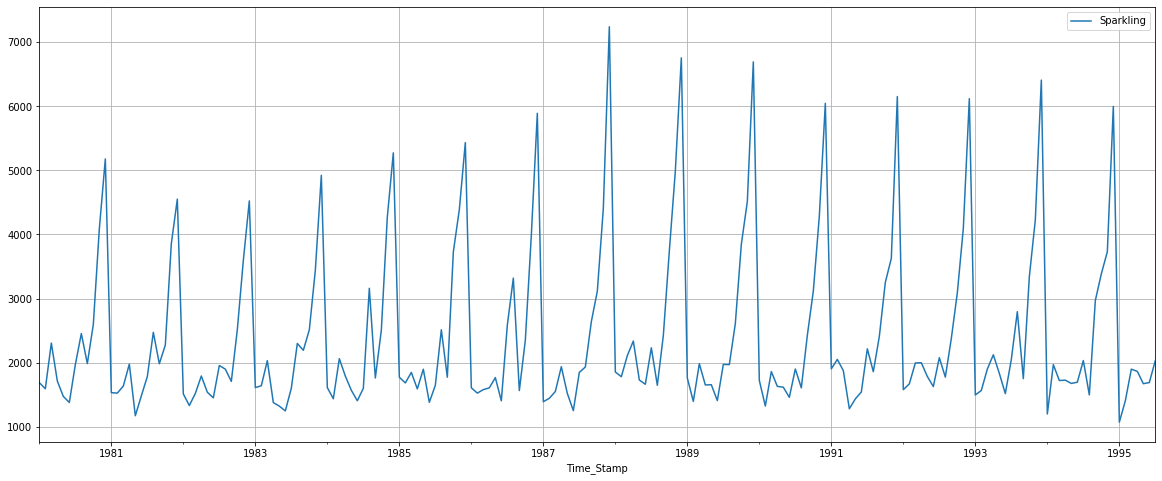

In [323]:
df.plot()
plt.grid();

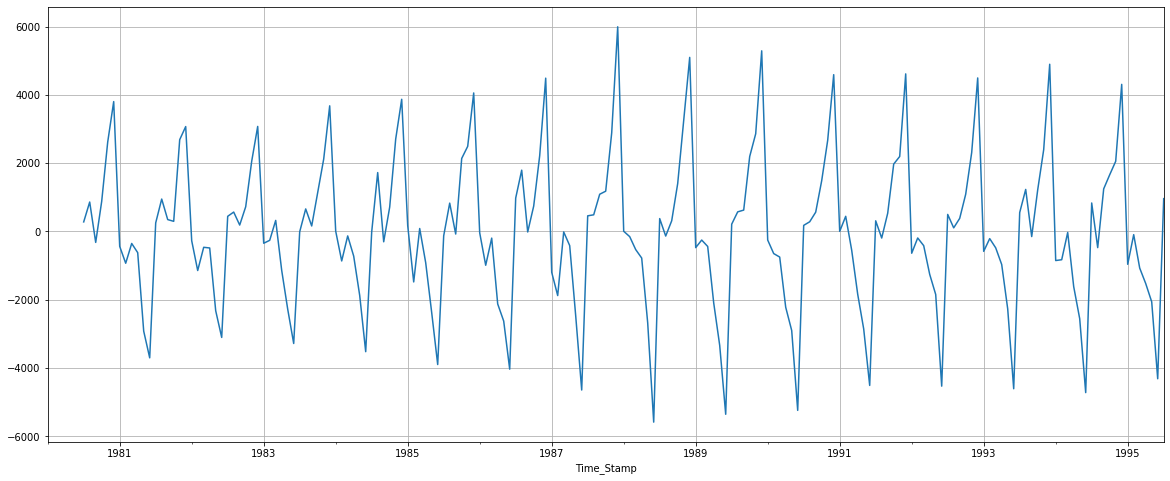

In [324]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

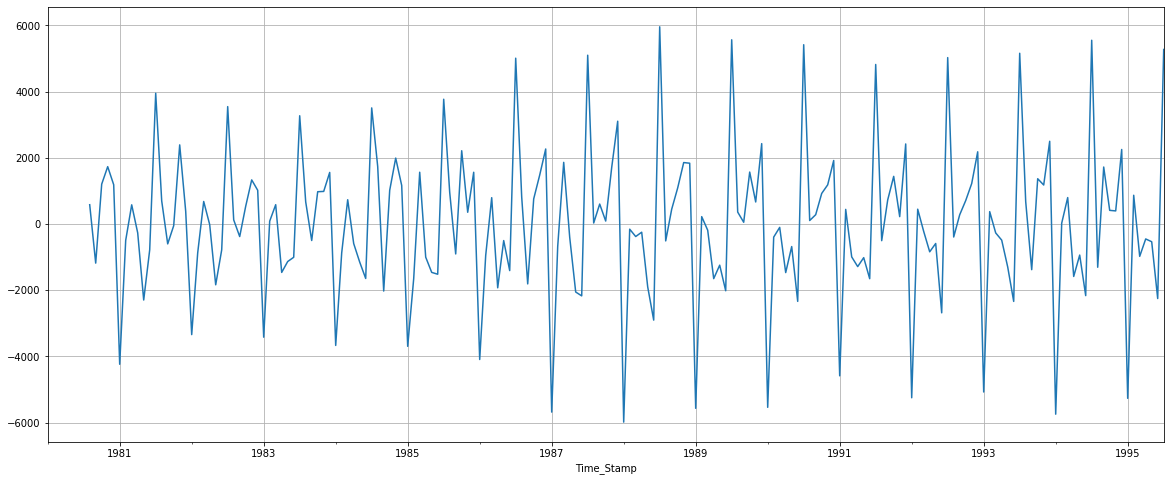

In [325]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

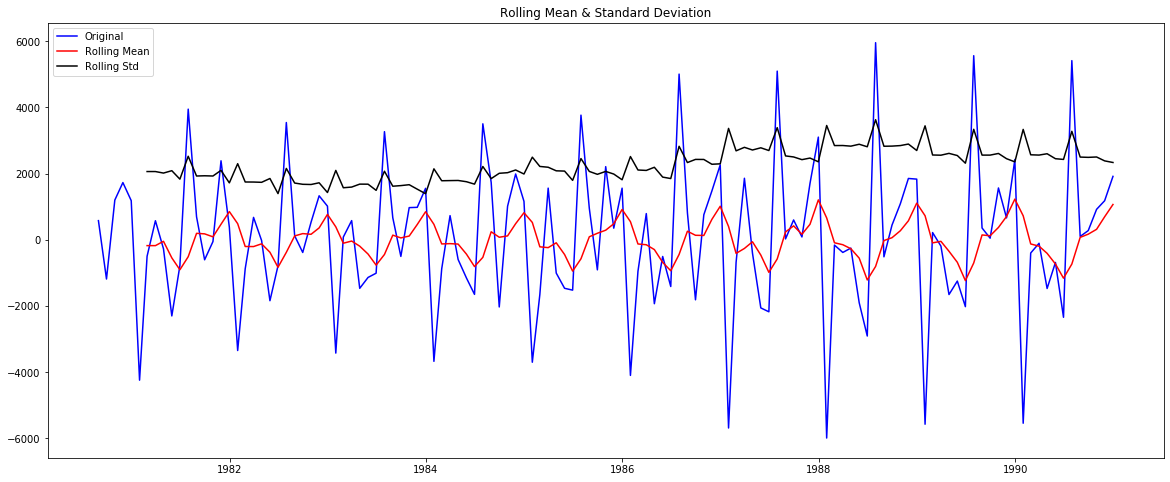

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [326]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


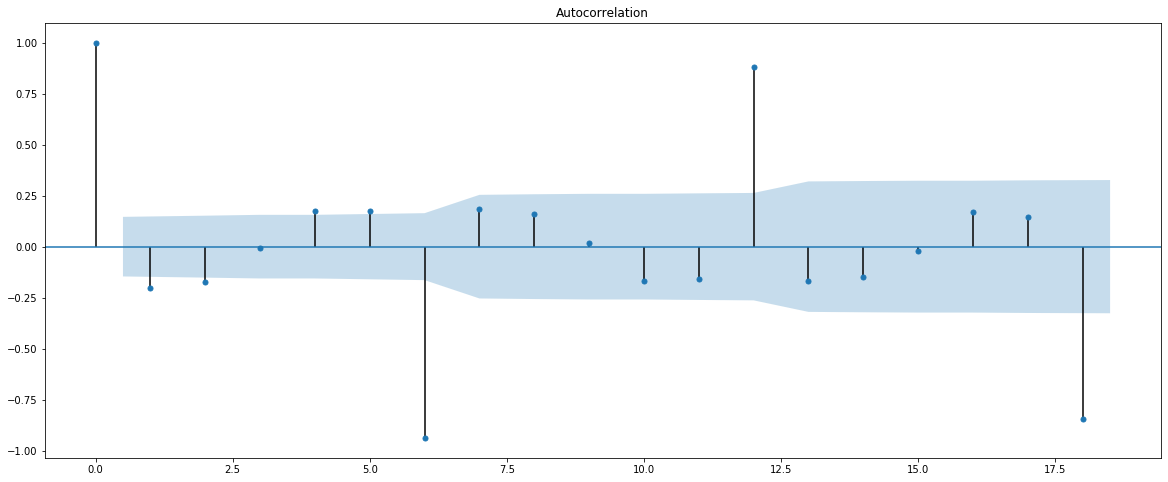

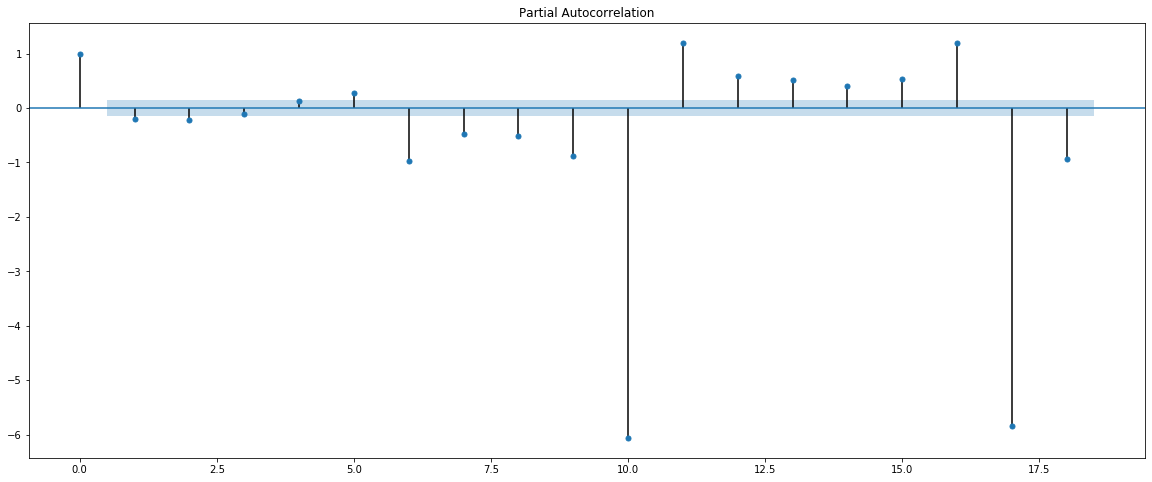

In [327]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18);

In [328]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 6)   Log Likelihood                -821.646
Date:                                Sat, 12 Sep 2020   AIC                           1657.292
Time:                                        14:07:09   BIC                           1676.259
Sample:                                             0   HQIC                          1664.986
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1336      0.116      1.151      0.250      -0.094       0.361
ma.

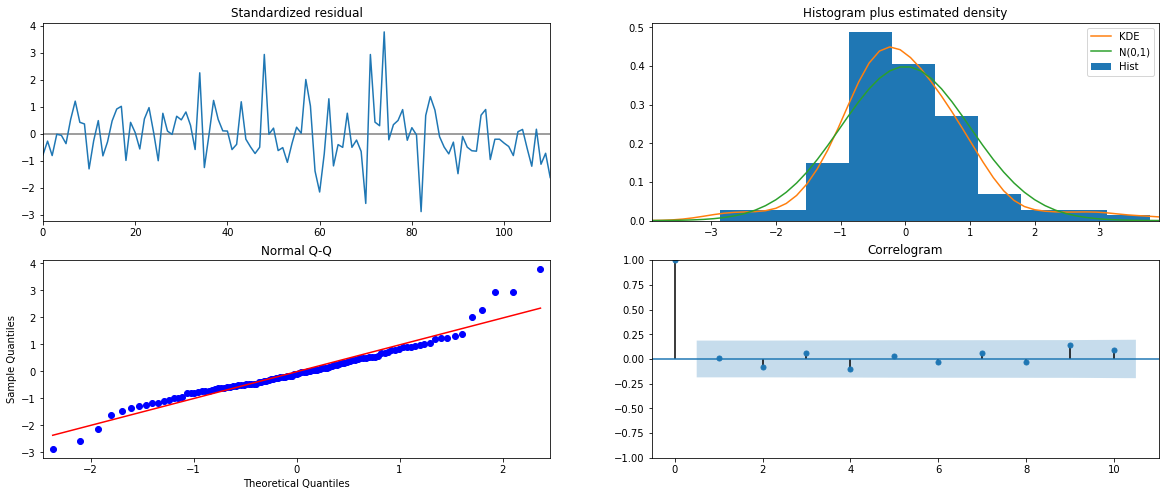

In [329]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [330]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [331]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1473.344953,393.008211,703.063014,2243.626891
1,1148.420074,401.740928,361.022323,1935.817824
2,1789.342404,403.926121,997.661755,2581.023053
3,1598.777722,405.565430,803.884086,2393.671358
4,1373.822230,407.132682,575.856836,2171.787624


In [332]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

550.9542268751511


In [333]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,1)(2,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.180166
"ARIMA(1,1,1)",1275.081804
"SARIMA(0,1,2)(1,0,2,12)",507.869768
"SARIMA(1,1,1)(2,1,2,6)",550.954227


In [334]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1174.374
Date:                            Sat, 12 Sep 2020   AIC                           2360.749
Time:                                    14:07:11   BIC                           2379.162
Sample:                                01-31-1980   HQIC                          2368.226
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8415      0.078    -10.792      0.000      -0.994      -0.689
ma.L2         -0.1125      0.082   

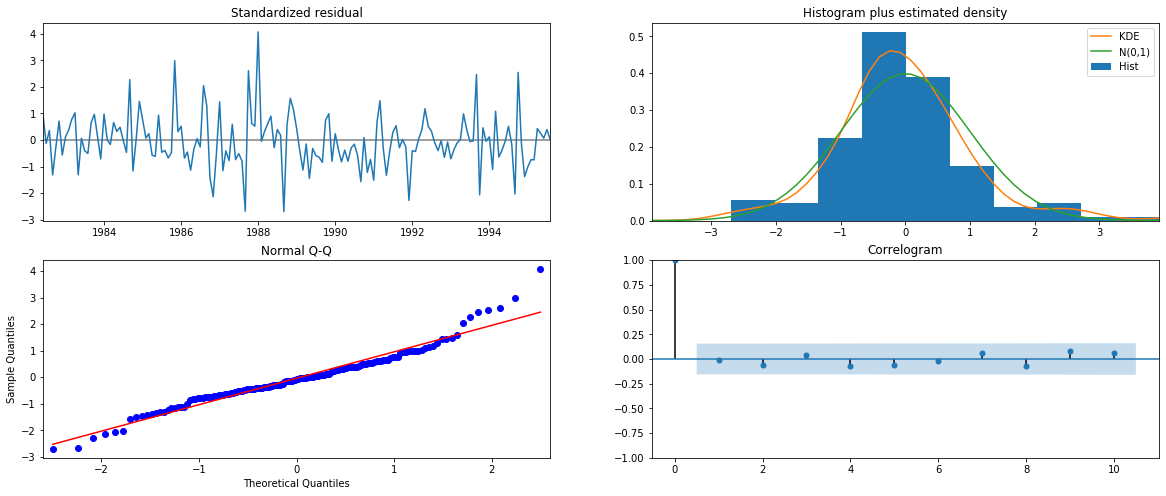

In [335]:
results_full_data_model.plot_diagnostics();

In [336]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=55)

In [337]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1841.520492,382.520654,1091.793787,2591.247196
1995-09-30,2493.017907,387.294864,1733.933923,3252.101890
1995-10-31,3324.329712,387.694709,2564.462045,4084.197379
1995-11-30,4015.767885,388.094142,3255.117344,4776.418427
1995-12-31,6278.852047,388.493169,5517.419427,7040.284667


In [338]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 534.7642712906405


In [339]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='2000-02-29', freq='M'))


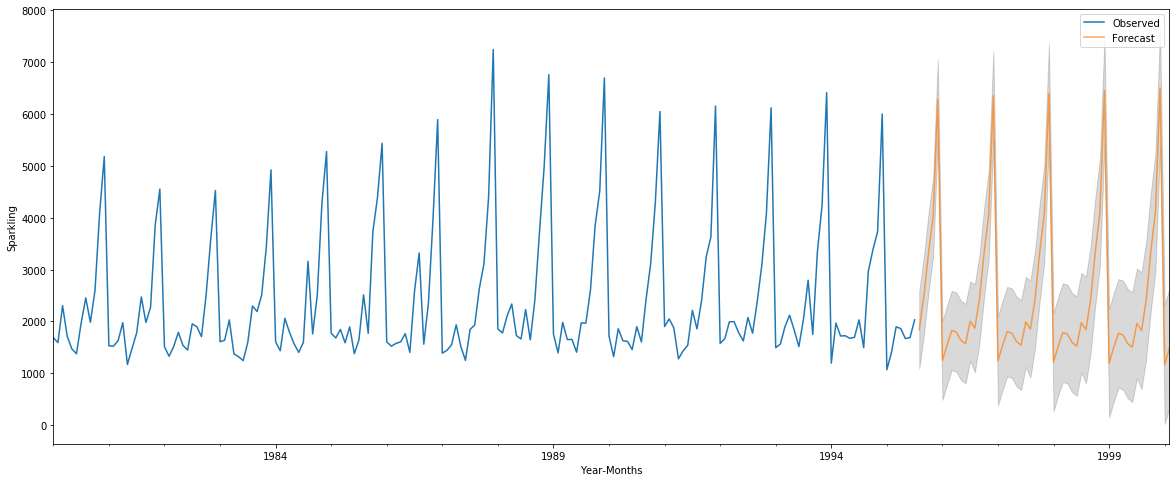

In [340]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [341]:
resultsDf

,RMSE
"ARIMA(2,1,2)",1374.180166
"ARIMA(1,1,1)",1275.081804
"SARIMA(0,1,2)(1,0,2,12)",507.869768
"SARIMA(1,1,1)(2,1,2,6)",550.954227
